In [1]:
# pip install scikit-fuzzy

In [2]:
# pip install paho-mqtt

In [1]:
# Fuzzy logic and Controll dependencies
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Mathemathical dependencies
import numpy as np
import time

# MQTT dependencies
import paho.mqtt.client as mqtt
import localCredentials as creds

# UI dependencies
from IPython.display import display
from ipywidgets import widgets

In [2]:
# Input cell to configure temperature

input_text = widgets.Text()
display(input_text)

def handle_submit(sender):
    print(input_text.value)
    user_input = input_text.value

input_text.on_submit(handle_submit)

Text(value='')

C:\Users\Diego AC\AppData\Local\Temp\ipykernel_6236\760779364.py:10: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  input_text.on_submit(handle_submit)


1


In [3]:
# MQTT Broker
client = mqtt.Client(creds.client)
client.connect(creds.ip, creds.port, 60)

0

In [4]:
# Create Antecedent/Consequent objects for fuzzy controller
errotemp = ctrl.Antecedent(np.arange(-8, 18.1, 0.1), 'errotemp')
varerrotemp = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'varerrotemp')
resfriador = ctrl.Consequent(np.arange(0, 101, 1), 'resfriador')

c:\Users\Diego AC\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


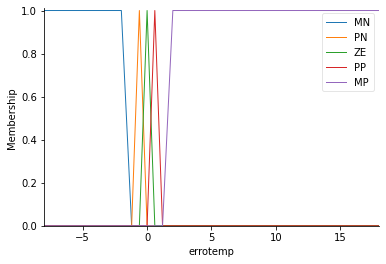

In [5]:
# Define membership functions for 'errotemp'
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2, -1.2])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-1.2, -0.6, 0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-0.6, 0, 0.6])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 0.6, 1.2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe, [1.2, 2, 18, 18])

# Display membership functions
errotemp.view()

c:\Users\Diego AC\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


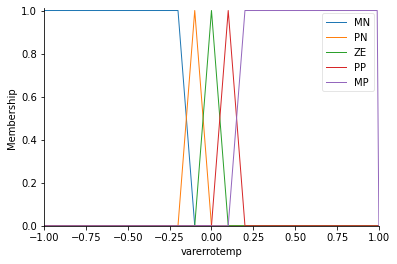

In [6]:
# Define membership functions for 'varerrotemp'
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-1, -1, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 1,1])

# Display 'varerrotemp' membership functions
varerrotemp.view()

c:\Users\Diego AC\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


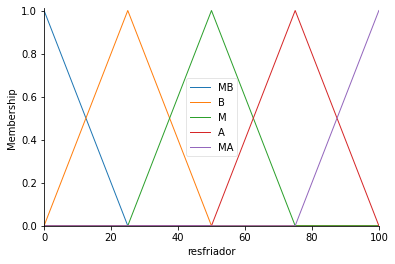

In [7]:
# Define membership functions for 'resfriador'
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0,0,25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0,25,50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])

# Display 'resfriador' membership functions
resfriador.view()

In [8]:
# Define fuzzy rules for the controller. Each rule determines the output of the cooler ('resfriador')
# based on the temperature error ('errotemp') and the variation in temperature error ('varerrotemp').

regra1 = ctrl.Rule(errotemp['MN'] & varerrotemp['MN'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['PN'] & varerrotemp['MN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MN'], resfriador['MB'])
regra4 = ctrl.Rule(errotemp['PP'] & varerrotemp['MN'], resfriador['A'])
regra5 = ctrl.Rule(errotemp['MP'] & varerrotemp['MN'], resfriador['M'])
regra6 = ctrl.Rule(errotemp['MN'] & varerrotemp['PN'], resfriador['MB'])
regra7 = ctrl.Rule(errotemp['PN'] & varerrotemp['PN'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PN'], resfriador['B'])
regra9 = ctrl.Rule(errotemp['PP'] & varerrotemp['PN'], resfriador['A'])
regra10 = ctrl.Rule(errotemp['MP'] & varerrotemp['PN'], resfriador['A'])
regra11 = ctrl.Rule(errotemp['MN'] & varerrotemp['ZE'], resfriador['MB'])
regra12 = ctrl.Rule(errotemp['PN'] & varerrotemp['ZE'], resfriador['B'])
regra13 = ctrl.Rule(errotemp['ZE'] & varerrotemp['ZE'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['PP'] & varerrotemp['ZE'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP'] & varerrotemp['ZE'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['MN'] & varerrotemp['PP'], resfriador['B'])
regra17 = ctrl.Rule(errotemp['PN'] & varerrotemp['PP'], resfriador['B'])
regra18 = ctrl.Rule(errotemp['ZE'] & varerrotemp['PP'], resfriador['A'])
regra19 = ctrl.Rule(errotemp['PP'] & varerrotemp['PP'], resfriador['MA'])
regra20 = ctrl.Rule(errotemp['MP'] & varerrotemp['PP'], resfriador['MA'])
regra21 = ctrl.Rule(errotemp['MN'] & varerrotemp['MP'], resfriador['M'])
regra22 = ctrl.Rule(errotemp['PN'] & varerrotemp['MP'], resfriador['B'])
regra23 = ctrl.Rule(errotemp['ZE'] & varerrotemp['MP'], resfriador['MA'])
regra24 = ctrl.Rule(errotemp['PP'] & varerrotemp['MP'], resfriador['MA'])
regra25 = ctrl.Rule(errotemp['MP'] & varerrotemp['MP'], resfriador['MA'])

In [9]:
# Create a Control System using the defined rules
resfriador_ctrl = ctrl.ControlSystem([
    regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9,
    regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17,
    regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25
])

# Create a Control System Simulation to simulate the control system
potencia = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [10]:
# Setpoint and initial temperature
sp = -8
tempatual = -5
print(tempatual)

# Calculate initial temperature error
erroatual = tempatual - sp

# Main control loop
while True: 
    # Calculate error and error variation
    erroanterior = erroatual
    erroatual = tempatual - sp
    varerroTemp = erroatual - erroanterior
    
    # Input error and error variation into the control system
    potencia.input['errotemp'] = erroatual
    potencia.input['varerrotemp'] = varerroTemp
    
    # Compute the output of the control system
    potencia.compute()
    
    # Update the temperature 10 times based on the output of the control system
    i = 0
    while (i < 10):
        tempatual = tempatual * 0.9952 - potencia.output['resfriador'] * 0.0003963
        time.sleep(0.1)
        i += 1
    
    # Print the current temperature, error, and error variation
    print('\n\nTEMP:', tempatual)
    print('ERR', erroatual)
    print('VAR ERR', varerroTemp)
    
    # Publish the current temperature and error to the MQTT broker
    client.publish("Resfriador/Temperatura", tempatual)
    client.publish("Resfriador/erro", erroatual)

-5


TEMP: -5.120646058416686
ERR 3
VAR ERR 0


TEMP: -5.14695280525448
ERR 2.8793539415833136
VAR ERR -0.12064605841668641


TEMP: -5.223317949350606
ERR 2.8530471947455203
VAR ERR -0.026306746837793327


TEMP: -5.271403374680104
ERR 2.776682050649394
VAR ERR -0.07636514409612616


TEMP: -5.327147112267874
ERR 2.728596625319896
VAR ERR -0.04808542532949822


TEMP: -5.376759475121065
ERR 2.672852887732126
VAR ERR -0.05574373758777007


TEMP: -5.426798596164336
ERR 2.623240524878935
VAR ERR -0.04961236285319082


TEMP: -5.474278395096884
ERR 2.5732014038356636
VAR ERR -0.05003912104327135


TEMP: -5.520803158345069
ERR 2.525721604903116
VAR ERR -0.04747979893254772


TEMP: -5.5656422818434175
ERR 2.4791968416549306
VAR ERR -0.04652476324818533


TEMP: -5.609279125082578
ERR 2.4343577181565825
VAR ERR -0.044839123498348066


TEMP: -5.65153394215937
ERR 2.390720874917422
VAR ERR -0.043636843239160505


TEMP: -5.692604122914485
ERR 2.3484660578406302
VAR ERR -0.042254817076791795


TEMP: -